In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBClassifier
%matplotlib inline

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(2)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0


In [14]:
target=train.loc[:,'Upvotes']
target=pd.DataFrame(target)
target.head(2)

,Upvotes
0,42.0
1,1175.0


In [15]:
neg=target["Upvotes"].apply(lambda i: i if i < 0 else 0)
neg.value_counts()

0    330045
Name: Upvotes, dtype: int64

In [16]:
#print('unique values in ID column',train['ID'].nunique())
train=train.drop('ID',axis=1)

In [17]:
#Null values check
train.isnull().any()

Tag           False
Reputation    False
Answers       False
Username      False
Views         False
Upvotes       False
dtype: bool

In [18]:
def find_outliers(data,column_name):
    # Set upper and lower limit to 3 standard deviation
    data_std = data[column_name].std()
    data_mean = np.mean(data[column_name])
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off
    print('column name:',column_name)
    print('lower_limit',lower_limit)
    print('upper_limit',upper_limit)
    
    # Generate outliers
    outliers=[]
    index_outliers=[]
    for outlier in data[column_name]:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
            #index_outliers.append(data[data[column_name]==outlier].index.values.astype(int)[0])
    
    print('rows in train',data.shape[0])
    print('no of outliers in  '+column_name,len(outliers))
    print(outliers[0:11])
    print('max value in outliers:',max(outliers))
    print('min value in outliers:',min(outliers))
    print('----------------------------------------')


column name: Reputation
lower_limit -73411.09096213506
upper_limit 88957.38455846283
rows in train 330045
no of outliers in  Reputation 4921
[94541.0, 93269.0, 125111.0, 164870.0, 249097.0, 139905.0, 126101.0, 170791.0, 241819.0, 229039.0, 189302.0]
max value in outliers: 1042428.0
min value in outliers: 89034.0
----------------------------------------


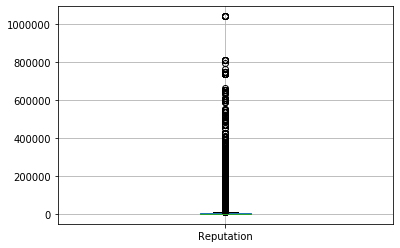

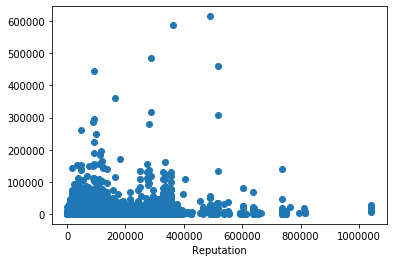

************************************************
column name: Answers
lower_limit -6.8208720127280635
upper_limit 14.65621567798583
rows in train 330045
no of outliers in  Answers 6352
[22.0, 41.0, 16.0, 17.0, 25.0, 19.0, 21.0, 25.0, 15.0, 16.0, 20.0]
max value in outliers: 76.0
min value in outliers: 15.0
----------------------------------------


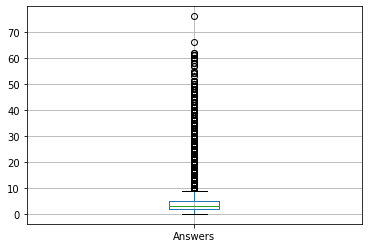

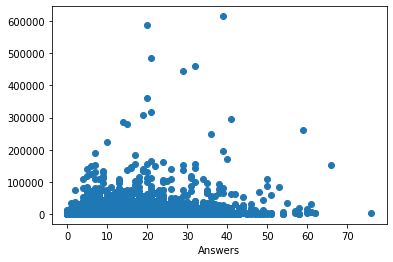

************************************************
column name: Views
lower_limit -213224.2980932106
upper_limit 272514.44077678403
rows in train 330045
no of outliers in  Views 4436
[752007.0, 281031.0, 895555.0, 475111.0, 308967.0, 414160.0, 285780.0, 304176.0, 958594.0, 339394.0, 447567.0]
max value in outliers: 5231058.0
min value in outliers: 272551.0
----------------------------------------


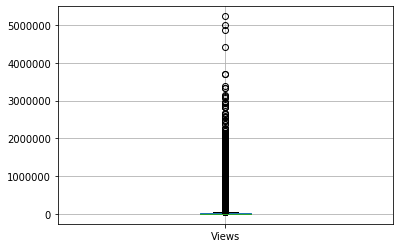

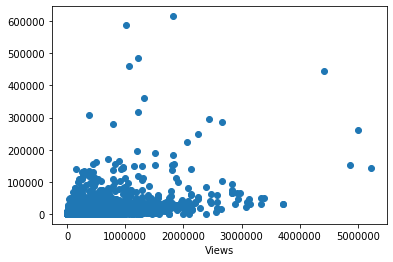

************************************************


In [19]:
outliers= ['Reputation', 'Answers', 'Views']
for clm in outliers:
    find_outliers(train,clm)
    boxplot = train.boxplot(column=[clm])
    plt.show()
    plt.scatter(train[clm],train['Upvotes'])
    plt.xlabel(clm)
    plt.show()
    print('************************************************')

## Handling outliers
### To handle true outliers is to cap them. For example, if you’re using income, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact.

In [8]:
#train['Reputation']=train['Reputation'].apply(lambda x:90000 if x>89000 else x)

# Skewness Check

Text(0, 0.5, 'Frequency')

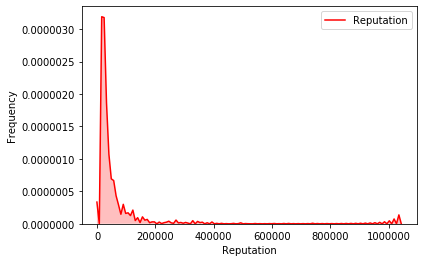

In [20]:
g = sns.kdeplot(train["Reputation"], color="Red", shade = True)
g.set_xlabel("Reputation")
g.set_ylabel("Frequency")

## Handling categorical variables

In [21]:
train.head(2)

,Tag,Reputation,Answers,Username,Views,Upvotes
0,a,3942.0,2.0,155623,7855.0,42.0
1,a,26046.0,12.0,21781,55801.0,1175.0


In [22]:
train=train.drop('Upvotes',axis=1)
train=pd.get_dummies(train)

In [23]:
from sklearn.model_selection import train_test_split
x=train
y=target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_train=poly_reg.fit_transform(X_train)
poly_reg.fit(X_train,y_train)

X_test=poly_reg.fit_transform(X_test)

linReg = LinearRegression()
linReg.fit(X_train,y_train)
predicted_linReg = linReg.predict(X_test)

print("RMSE Linear: %.2f" % np.sqrt(mean_squared_error(y_test, predicted_linReg)))
print('************************************************')

from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 GradientBoostingRegressor:",score)
predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train GradientBoostingRegressor: ',rmse_train)
print('rmse_test GradientBoostingRegressor: ',rmse_test)
print('************************************************')

import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 xgb:",score)

predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train xgb: ',rmse_train)
print('rmse_test xgb: ',rmse_test)
print('************************************************')
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 RandomForestRegressor: ",score)

predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train RandomForestRegressor: ',rmse_train)
print('rmse_test RandomForestRegressor: ',rmse_test)
print('************************************************')

RMSE Linear: 888.31
************************************************
r2 GradientBoostingRegressor: 0.978024168960347
rmse_train GradientBoostingRegressor:  564.3169276642484
rmse_test GradientBoostingRegressor:  1357.7288665938431
************************************************
[20:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 xgb: 0.9768555891452781
rmse_train xgb:  579.1265683026427
rmse_test xgb:  1506.6950289784886
************************************************
r2 RandomForestRegressor:  0.9846131955240836
rmse_train RandomForestRegressor:  472.1985419789103
rmse_test RandomForestRegressor:  1422.4775951092404
************************************************


In [26]:
print(X_train)

[[1.0000e+00 3.8600e+02 9.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.2060e+03 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0697e+04 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 2.6440e+03 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 3.1680e+03 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [24]:
test=pd.read_csv('test.csv')
test.head()

ids_df=test.loc[:,'ID']
ids_df=pd.DataFrame(ids_df)
ids_df.columns=['ID']
ids_df.head()

test=test.drop('ID',axis=1)
test.head()

,Tag,Reputation,Answers,Username,Views
0,a,5645.0,3.0,50652,33200.0
1,c,24511.0,6.0,37685,2730.0
2,i,927.0,1.0,135293,21167.0
3,i,21.0,6.0,166998,18528.0
4,i,4475.0,10.0,53504,57240.0


## Test with GradientBoostingRegressor

In [27]:
test=pd.get_dummies(test)
poly_reg=PolynomialFeatures(degree=3)
test=poly_reg.fit_transform(test)

from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 GradientBoostingRegressor:",score)
predictions_test=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.head()

r2 GradientBoostingRegressor: 0.978024168960347


,0
0,213.780881
1,81.330176
2,51.496874
3,33.491620
4,267.544347


In [28]:
predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
result.head(1)

result.to_csv('D:\Result_upvotes.csv',index=False)

## Test with RandomForestRegressor

In [ ]:
test=pd.get_dummies(test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 RandomForestRegressor: ",score)

predictions_test=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.head()

r2 RandomForestRegressor:  0.9846131955240836


,0
0,225.2
1,95.0
2,33.5
3,14.3
4,372.1


In [30]:
predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
print(result.head(1))

result.to_csv('D:\Result_upvotes_random.csv',index=False)

       ID  Upvotes
0  366953    225.2


## After reducing skewness

In [31]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train=train.drop('ID',axis=1)
train.head(2)

,Tag,Reputation,Answers,Username,Views,Upvotes
0,a,3942.0,2.0,155623,7855.0,42.0
1,a,26046.0,12.0,21781,55801.0,1175.0


In [32]:
train=pd.get_dummies(train)
train.head(1)

,Reputation,Answers,Username,Views,Upvotes,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,155623,7855.0,42.0,1,0,0,0,0,0,0,0,0,0


In [33]:
train["Views"]=train["Views"].apply(lambda i: np.log(i) if i > 0 else 0)
train["Reputation"]=train["Reputation"].apply(lambda i: np.log(i) if i > 0 else 0)
train["Tag_x"]=train["Tag_x"].apply(lambda i: np.log(i) if i > 0 else 0)
train["Answers"]=train["Answers"].apply(lambda i: np.log(i) if i > 0 else 0)
train["Tag_o"]=train["Tag_o"].apply(lambda i: np.log(i) if i > 0 else 0)
train["Tag_r"]=train["Tag_r"].apply(lambda i: np.log(i) if i > 0 else 0)
train.head(1)

,Reputation,Answers,Username,Views,Upvotes,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,8.279443,0.693147,155623,8.968906,42.0,1,0,0,0,0,0.0,0,0.0,0,0.0


In [34]:
x=train
y=target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [35]:
test=pd.read_csv('test.csv')
test.head()

ids_df=test.loc[:,'ID']
ids_df=pd.DataFrame(ids_df)
ids_df.columns=['ID']
ids_df.head()

test=test.drop('ID',axis=1)
test.head()

,Tag,Reputation,Answers,Username,Views
0,a,5645.0,3.0,50652,33200.0
1,c,24511.0,6.0,37685,2730.0
2,i,927.0,1.0,135293,21167.0
3,i,21.0,6.0,166998,18528.0
4,i,4475.0,10.0,53504,57240.0


In [36]:
test=pd.get_dummies(test)
test["Views"]=test["Views"].apply(lambda i: np.log(i) if i > 0 else 0)
test["Reputation"]=test["Reputation"].apply(lambda i: np.log(i) if i > 0 else 0)
test["Tag_x"]=test["Tag_x"].apply(lambda i: np.log(i) if i > 0 else 0)
test["Answers"]=test["Answers"].apply(lambda i: np.log(i) if i > 0 else 0)
test["Tag_o"]=test["Tag_o"].apply(lambda i: np.log(i) if i > 0 else 0)
test["Tag_r"]=test["Tag_r"].apply(lambda i: np.log(i) if i > 0 else 0)
test.head(1)

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,8.638525,1.098612,50652,10.410305,1,0,0,0,0,0.0,0,0.0,0,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 RandomForestRegressor: ",score)

predictions_test=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.head()

In [ ]:
predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
print(result.head(1))

result.to_csv('D:\Result_upvotes_random_afterskew.csv',index=False)

## Correlation between predictors and dropping them

In [ ]:
corrmat = train.corr() 
plt.figure(figsize=(10,10))
corr_graph = sns.heatmap(corrmat, cmap ="Oranges", linewidths = 0.2); 
#plt.setp(corr_graph.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
corr_graph